# Hopfield Network

Hopfield networks [[1]](#References) are recurrent neural networks that can memorize configurations of neural states. The structure of a Hopfield network can be represented as follows:

<p align="center">
    <img width=300 height=300 src="../images/architecture_hopfield.png">
</p>

All the units forming the network are connected with each other, which can be understood as a complete undirected graph. At the same time, units work both as inputs and outputs.

Hopfield networks can be used to store any kind of pattern involving _not firing_ neurons ($V_{i} = 0$) and _firing_ neurons ($V_{i} = 1$), where $V_i$ represents the state of neuron $i$. For example, a pattern for a network with 5 neurons can be $V = [1, 0, 0, 0, 1]$, where neuron $i = 1$ and $i = 5$ are firing. The ability of Hopfield networks to recall state configurations resides in its connectivity matrix. States are embedded into the weight matrix of the network as follows:

$$
W = \sum_{s} (2 V^{(s)} - 1) (2 V^{(s) T} - 1),
$$

where $s$ is the number of patterns to store. The main diagonal of $W$ is kept at 0 – neurons are not connected to themselves. 

Given any initial configuration, how does the network manage to find any of the configurations stored in $W$? The answer is the energy of the system. 

Let's suppose the network is in a given state $\tilde{V}$. The energy can be calculated as:

$$
E = -\frac{1}{2}  \tilde{V} W \tilde{V}^T 
$$

The lower the energy, the closest the current configuration to one of the patterns. Since each of the patterns in $V^{(s)}$ is associated to different energies, they can be understood as attractors. The network can end in a configuration not found in the initial patterns, but resulting in a combination of two or more. These configurations are known as spurious states, and can be interpreted as local minima.

The update rule of neurons is defined as:

$$
V_{i} = W_{i} \tilde{V},
$$

where $W_{i}$ represents the row $i$. If $V_{i} \geq 0$, $V_{i} \leftarrow 1$ and 0 otherwise. Since the update is produced a neuron at a time, the update is known as asynchronous.


## Vowel encoding

We will use Hopfield networks to encode and retrieve vowels. We can encode vowels by rearranging the states into a squared matrix:

<p align="center">
    <img width=600 height=550 src="../images/state_vectors.png">
</p>

The network will be formed by 25 neurons, representing each of the vowels in a 5 by 5 grid:

<p align="center">
    <img width=700 height=550 src="../images/vowels.png">
</p>

In [1]:
# Add temporary path to code
import sys
sys.path.append("../recurrent_neural_networks/")

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from hopfield_network import HopfieldNetwork
from utils import get_state_vowel

# Random seed (for reproducibility)
np.random.seed(1234)

Function `get_state_vowel` from utils returns the state for the vowel passed as argument. All patterns are stored in a matrix and passed to the network.

To mantain the number of updates for each neuron, each will be updated exactly once per pass. 

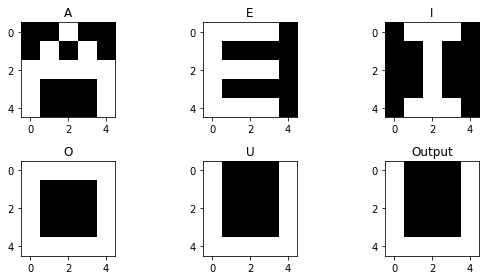

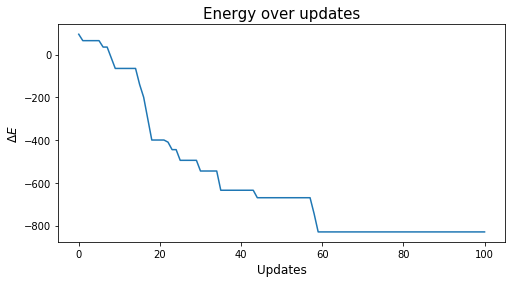

In [2]:
# Run Hopfield network
patterns = np.array([get_state_vowel('A'),
                         get_state_vowel('E'),
                         get_state_vowel('I'),
                         get_state_vowel('O'),
                         get_state_vowel('U')])
net = HopfieldNetwork(patterns)
net.run()

# Plot patterns and output
plt.figure(figsize=(8, 4), tight_layout=True)
plt.subplot(2, 3, 1)
plt.imshow(np.reshape(patterns[0, :], (5, 5)), cmap="Greys_r")
plt.title("A")
plt.subplot(2, 3, 2)
plt.imshow(np.reshape(patterns[1, :], (5, 5)), cmap="Greys_r")
plt.title("E")
plt.subplot(2, 3, 3)
plt.imshow(np.reshape(patterns[2, :], (5, 5)), cmap="Greys_r")
plt.title("I")
plt.subplot(2, 3, 4)
plt.imshow(np.reshape(patterns[3, :], (5, 5)), cmap="Greys_r")
plt.title("O")
plt.subplot(2, 3, 5)
plt.imshow(np.reshape(patterns[4, :], (5, 5)), cmap="Greys_r")
plt.title("U")
plt.subplot(2, 3, 6)
plt.imshow(np.reshape(net.state_units, (5, 5)), cmap="Greys_r")
plt.title("Output")

# Plot energy over time
plt.figure(figsize=(8, 4))
plt.plot(range(net.passes * net.num_units + 1), net.energy)
plt.title("Energy over updates", fontsize=15)
plt.xlabel("Updates", fontsize=12)
plt.ylabel(r"$\Delta E$", fontsize=12)
plt.show()


The seed has been fixed for reproducibility. To obtain different results, change it for another one. _Updates_ in the energy plot refer to the times a neuron is chosen for update. Therefore, the number of total updates will be `num_units` $\times$ `num_passes` + 1 (since we check the energy of the initial configuration). Note that updates are independent of whether the neuron has changed its past 

After embedding the five different states from the vowels, we can see that the network converges towards vowel "O". In this case, the network has been capable of retrieving exactly one of the initial patterns. For other initial conditions, we may reach one of the rest. As mentioned before, we can even get something in between those patterns. 

## References


1. [Neural networks and physical systems with emergent collective computational abilities](https://www.pnas.org/content/79/8/2554)

## Other resources

[Hopfield Networks](http://web.cs.ucla.edu/~rosen/161/notes/hopfield.html)